# Test gaiaxpy

https://gaia-dpci.github.io/GaiaXPy-website/tutorials/Calibrator%20tutorial.html

https://gaia-dpci.github.io/GaiaXPy-website/tutorials/Converter%20tutorial.html

In [1]:
# Import the tool
from gaiaxpy import convert,calibrate, plot_spectra
import numpy as np
from astroquery.gaia import Gaia

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams["figure.figsize"] = (10,4)


In [3]:
# Path to file with XP CONTINUOUS RAW data (csv, ecsv, fits, or xml)
#f = '/Users/dagoret/DATA/GAIA/XpContinuousMeanSpectrum_000000-003111.csv'

In [4]:
#converted_spectra, sampling = convert(f)
#converted_spectra

# Read tables using Gaia

In [5]:
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source" 

In [6]:
gaiadr3_table = Gaia.load_table('gaiadr3.gaia_source')

Retrieving table 'gaiadr3.gaia_source'


In [7]:
for column in gaiadr3_table.columns:
    print(column.name)

solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pm
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
nu_eff_used_in_astrometry
pseudocolour
pseudocolour_error
ra_pseudocolour_corr
dec_pseudocolour_corr
parallax_pseudocolour_corr
pmra_pseudocolour_corr
pmdec_pseudocolour_corr
astrometric_matched_transits
visibility_periods_used
astrometric_sigma5d_max
matched_transits
new_matched_transits
matched_transits_removed
ipd_gof_harmonic_amplitude
ipd_gof_harmonic_phase
ipd_frac_multi_peak
ipd_frac_odd_win
ruwe
scan_direction_strength_k1
scan_di

In [8]:
query_input = "select TOP 20 source_id, ra,dec from gaiadr3.gaia_source where has_xp_continuous = 'True'"
query_input

"select TOP 20 source_id, ra,dec from gaiadr3.gaia_source where has_xp_continuous = 'True'"

In [9]:
query_input2 = "select TOP 20 source_id, ra,dec from gaiadr3.gaia_source where dec < -20 and dec> -70 and has_xp_continuous = 'True'"
query_input2

"select TOP 20 source_id, ra,dec from gaiadr3.gaia_source where dec < -20 and dec> -70 and has_xp_continuous = 'True'"

In [10]:
job = Gaia.launch_job(query=query_input2)
results = job.get_results()

In [11]:
results

source_id,ra,dec
,deg,deg
int64,float64,float64
5937144193346721408,251.45804206082292,-50.77276909879204
5937144193346721920,251.46613870997248,-50.772106199105416
5937144197664637184,251.47022707251838,-50.76731821013285
5937144197664673408,251.46138754144994,-50.76572147925913
5937173266047606784,250.24281628084964,-51.61231120780248
5937173266047609856,250.24636273465987,-51.608791255002544
5937173266047613056,250.23423423447477,-51.61235719819289
5937173266047615232,250.238454875377,-51.60986333917953


## Convert the spectrum

In [12]:
converted_spectra, sampling = convert(query_input)
converted_spectra

INFO: Query finished. [astroquery.utils.tap.core]


,source_id,xp,flux,flux_error
0,5937144193346721408,BP,"[-2.1796710481116204, -2.097099773543435, -1.9...","[2.371812520328398, 2.4048403440707546, 2.4253..."
1,5937144193346721408,RP,"[1.851511276465908, 1.975631027495495, 2.10280...","[1.0265848217957312, 1.0380270489761372, 1.043..."
2,5937144193346721920,BP,"[0.5709181284681283, 0.5977686104593283, 0.623...","[1.3034700086471018, 1.327806436236202, 1.3462..."
3,5937144193346721920,RP,"[0.4118146298008157, 0.45250825904854547, 0.49...","[0.5331100746269625, 0.5393965897397444, 0.542..."
4,5937144197664637184,BP,"[1.0923024031878448, 1.121722858582869, 1.1454...","[1.2451723022563603, 1.268365251206838, 1.2860..."
5,5937144197664637184,RP,"[1.1149283152911262, 1.1421774105569262, 1.164...","[0.6207916294235738, 0.6298275961221244, 0.635..."
6,5937144197664673408,BP,"[6.449253586531201, 6.64090642408983, 6.808421...","[6.647405334259809, 6.73512160228513, 6.789266..."
7,5937144197664673408,RP,"[2.278706616465298, 2.5632089140466645, 2.8683...","[3.308857549877446, 3.326079273269951, 3.32150..."
8,5937173266047606784,BP,"[0.7854374880141427, 0.8867269609984407, 0.991...","[1.4201787805032442, 1.4472138078903563, 1.467..."
9,5937173266047606784,RP,"[0.9738023151051896, 1.0589645892127906, 1.148...","[0.7795405401042047, 0.7840589905494533, 0.783..."


In [13]:
converted_spectra.columns

Index(['source_id', 'xp', 'flux', 'flux_error'], dtype='object')

## Extract the source id

In [14]:
source_id_list = converted_spectra['source_id']
sources_list = list(np.unique(source_id_list.values)) # The sourceIds can be string or long.
Nsources = len(sources_list)

## Calibrate the spectra

In [15]:
calibrated_spectra, sampling = calibrate(sources_list)
calibrated_spectra

,source_id,flux,flux_error
0,5937081315017896320,"[2.0836860101879485e-18, 1.8884407027821666e-1...","[2.1460761104652817e-18, 1.5451486138578912e-1..."
1,5937081315017896576,"[1.44500824533399e-19, -1.5734619351732083e-19...","[2.2388837331264007e-18, 1.5919922871823379e-1..."
2,5937081315017897600,"[4.384954573821558e-18, -7.655366377504742e-19...","[2.5774315346179143e-18, 1.8041279558719692e-1..."
3,5937081315017900416,"[3.3543837114246227e-18, 1.2962831579504124e-1...","[2.2966475670088248e-18, 1.6904227687984267e-1..."
4,5937144193346721408,"[5.683854532045694e-18, 2.9468530606459642e-18...","[3.768771823831399e-18, 2.7231816011214044e-18..."
5,5937144193346721920,"[-1.3877207481256108e-19, -2.63270917617471e-1...","[3.277629122657396e-18, 2.2438799382539755e-18..."
6,5937144197664637184,"[-9.109510827561551e-19, 2.8011277126698074e-1...","[3.666225625506609e-18, 2.6292465875409053e-18..."
7,5937144197664673408,"[1.1115238898841755e-18, 2.176732764896651e-18...","[4.107499722824849e-18, 3.0609890840192675e-18..."
8,5937144197726030080,"[3.81329865658547e-18, 1.6967897697464575e-18,...","[3.4065928652237884e-18, 2.4264262655957777e-1..."
9,5937144197726034816,"[1.1371400527674066e-17, 5.500258670696667e-18...","[6.247716421872572e-18, 5.124777541008284e-18,..."


## sampling

In [16]:
sampling = np.geomspace(330,1049.9999999999, 361)

In [17]:
calibrated_spectra_geom, sampling = calibrate(sources_list,sampling=sampling)
calibrated_spectra_geom

,source_id,flux,flux_error
0,5937081315017896320,"[-3.4314774763068764e-17, -2.4828183297376525e...","[1.913481479518136e-17, 1.0353486469916328e-17..."
1,5937081315017896576,"[2.1151571716026168e-17, 1.0546390177373216e-1...","[1.9127335652912387e-17, 1.0423737312828835e-1..."
2,5937081315017897600,"[-1.9536362549752682e-17, -6.6315657095668884e...","[2.337290412671887e-17, 1.2477948549650908e-17..."
3,5937081315017900416,"[1.0251568924107139e-17, 9.739610657860193e-18...","[1.9201624256146558e-17, 1.0374511980047374e-1..."
4,5937144193346721408,"[1.76772456666098e-17, 1.5787214327520507e-17,...","[3.213082276544896e-17, 1.7270493282367337e-17..."
5,5937144193346721920,"[1.9845256256081075e-17, -3.160479791568619e-1...","[3.014424220717266e-17, 1.6036211424558918e-17..."
6,5937144197664637184,"[1.5476651214926843e-17, 1.470004496955334e-17...","[3.2296997671548984e-17, 1.7359322859406294e-1..."
7,5937144197664673408,"[3.2294511821664804e-17, 1.583708335245002e-17...","[4.186075734588637e-17, 2.1211255708423192e-17..."
8,5937144197726030080,"[4.515190592020464e-18, 9.919456510719791e-18,...","[3.231687561481731e-17, 1.726106237188214e-17,..."
9,5937144197726034816,"[5.348351833747289e-17, 3.1880676290218257e-17...","[6.59599805414128e-17, 3.1371045858119197e-17,..."


## Plot spectra

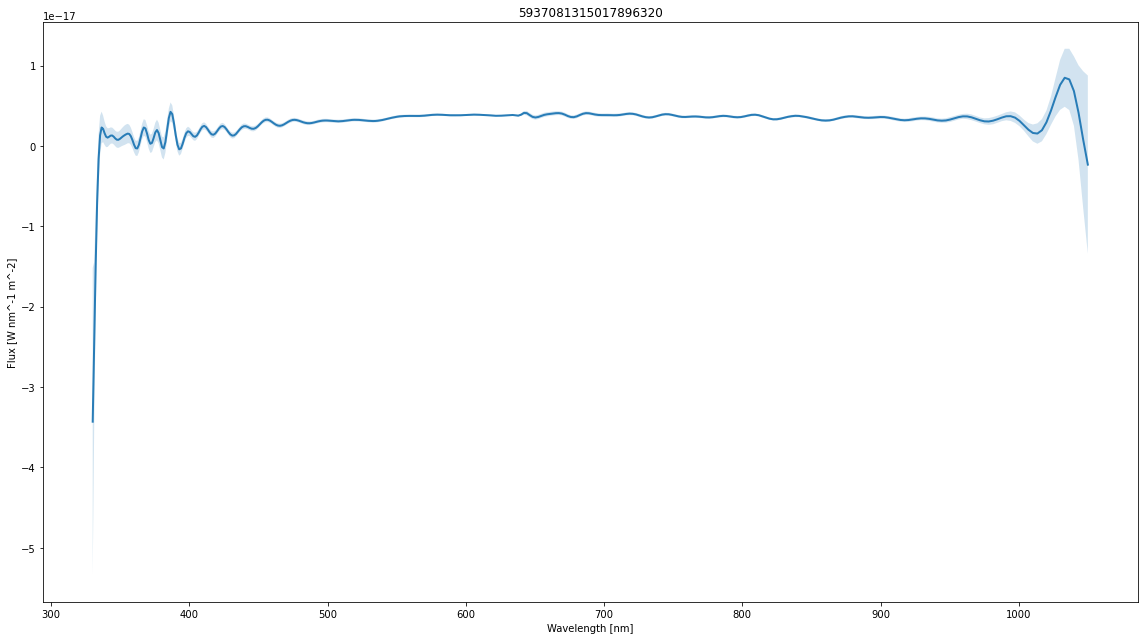

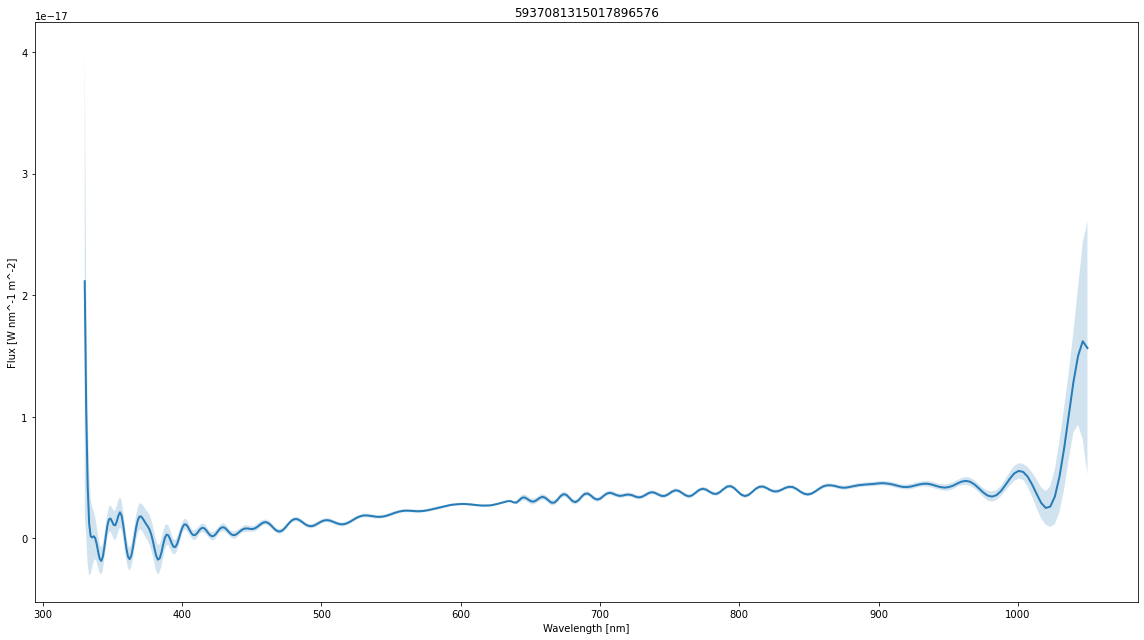

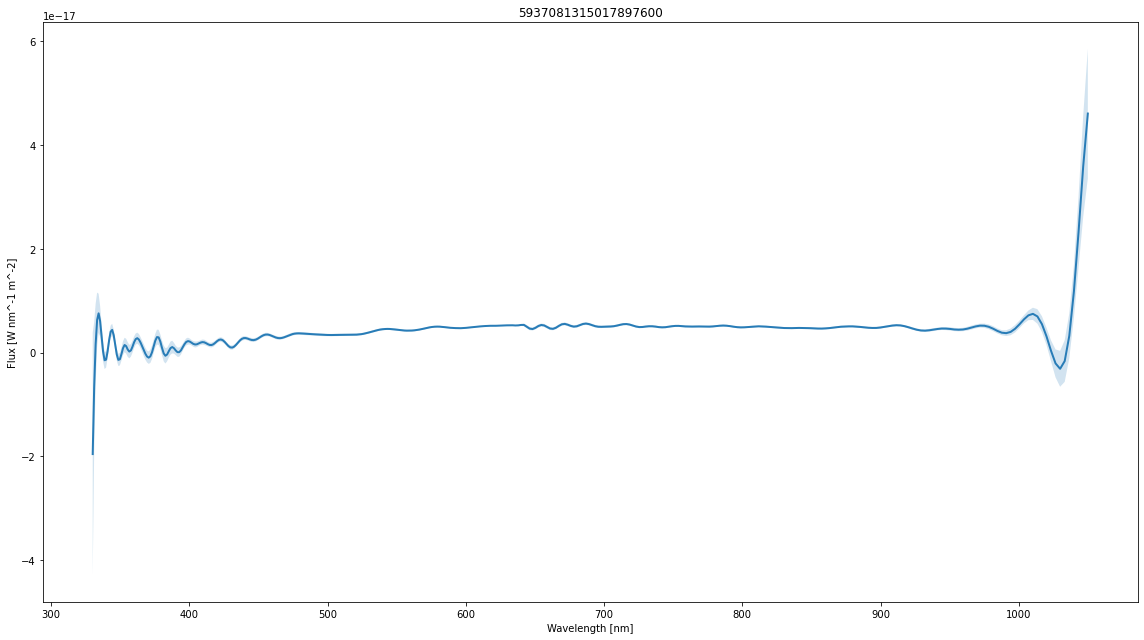

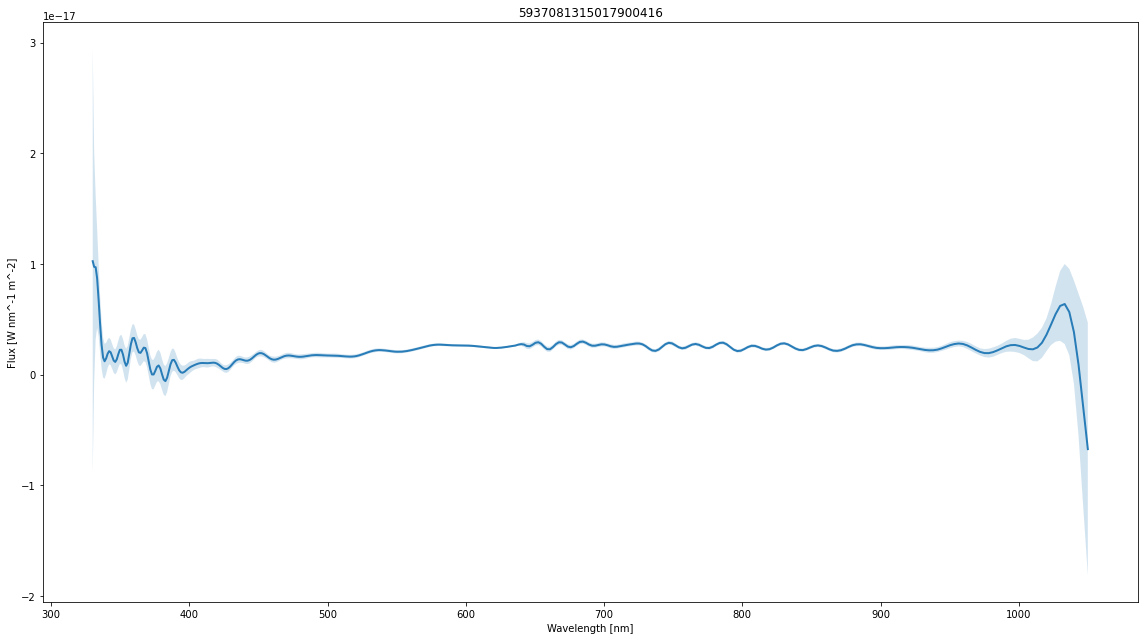

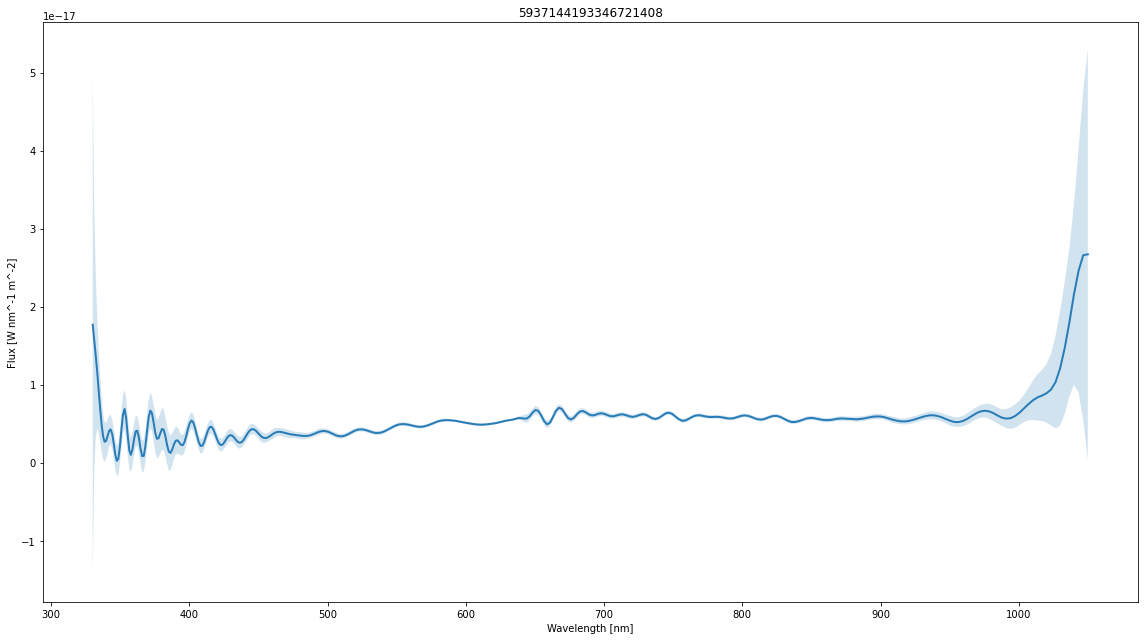

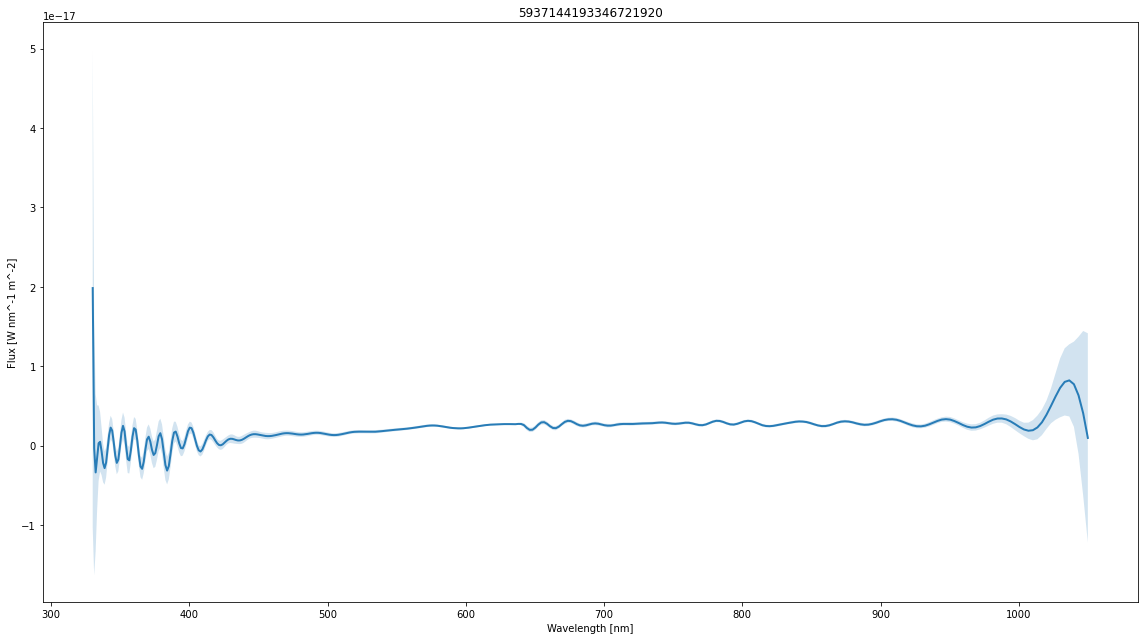

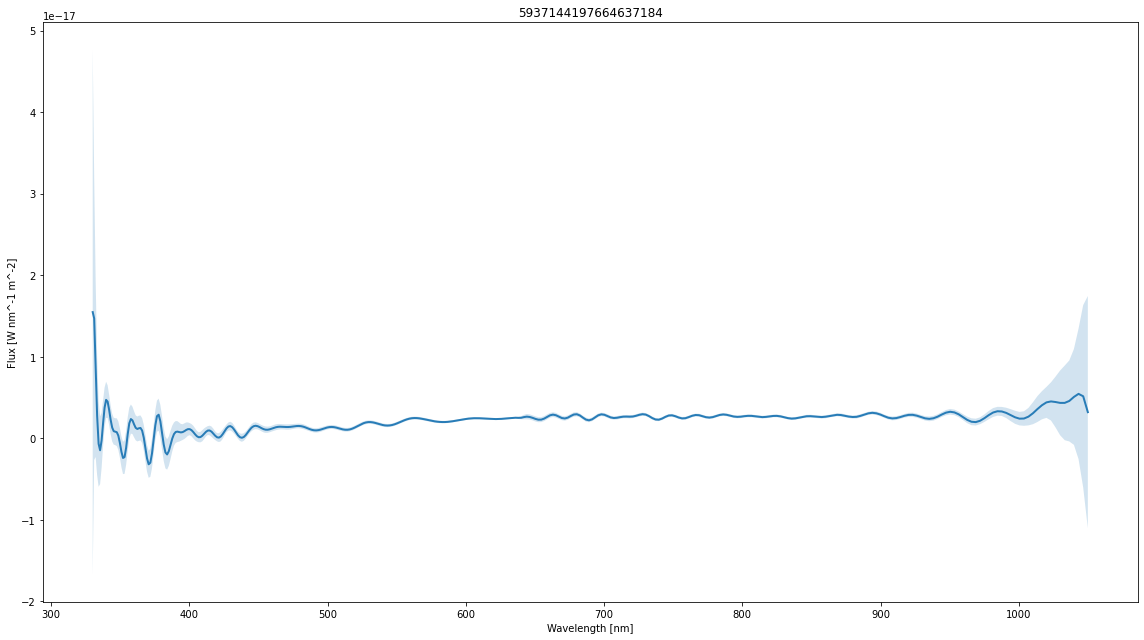

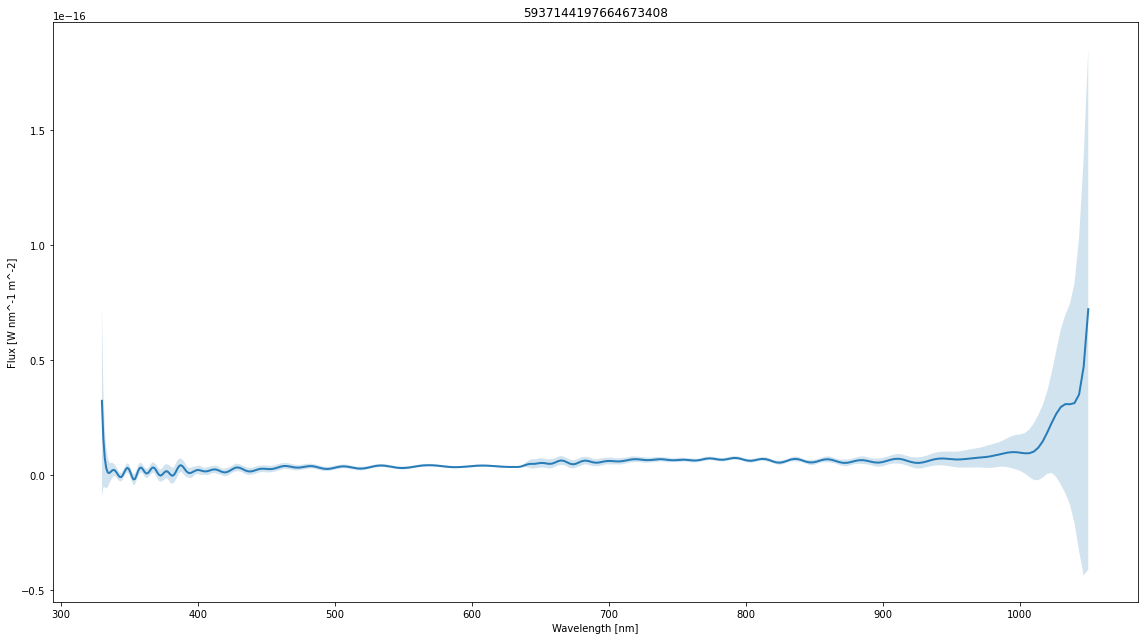

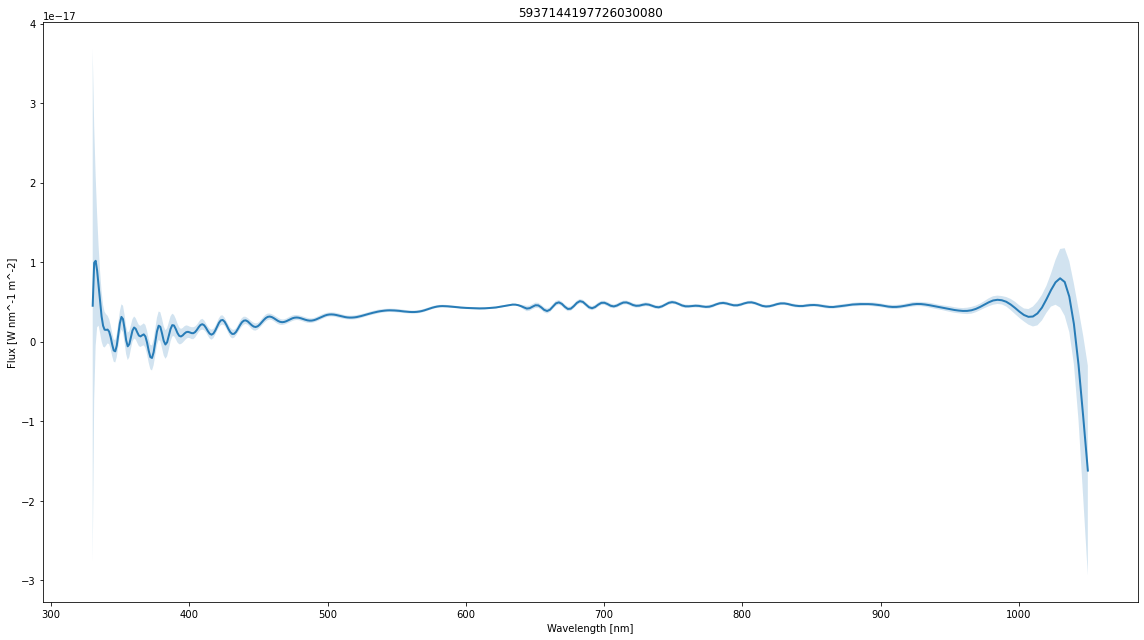

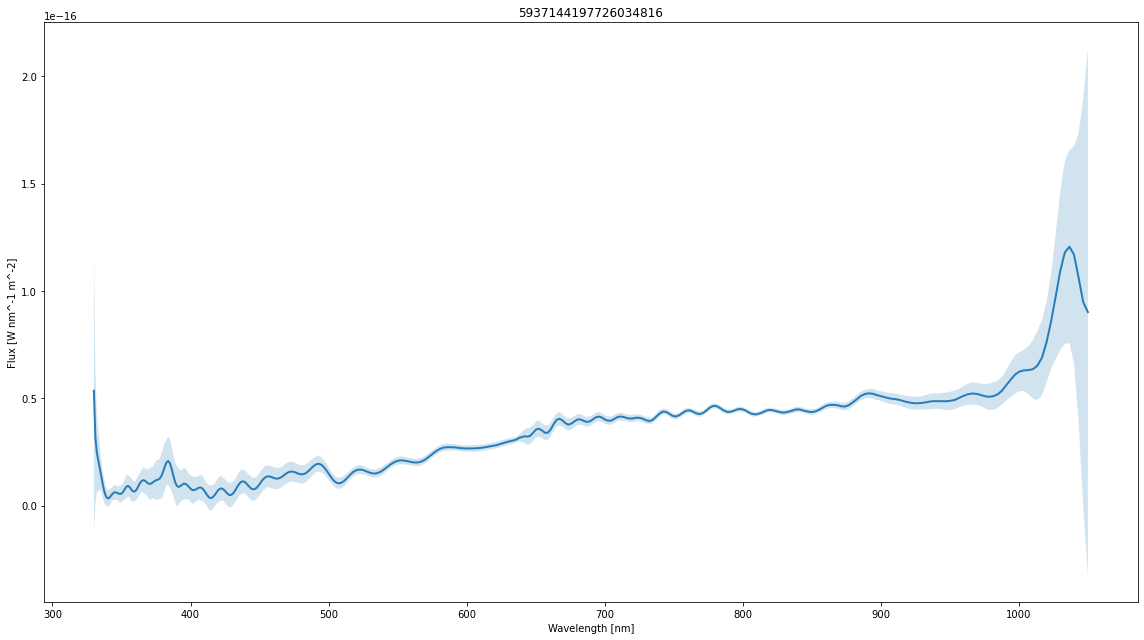

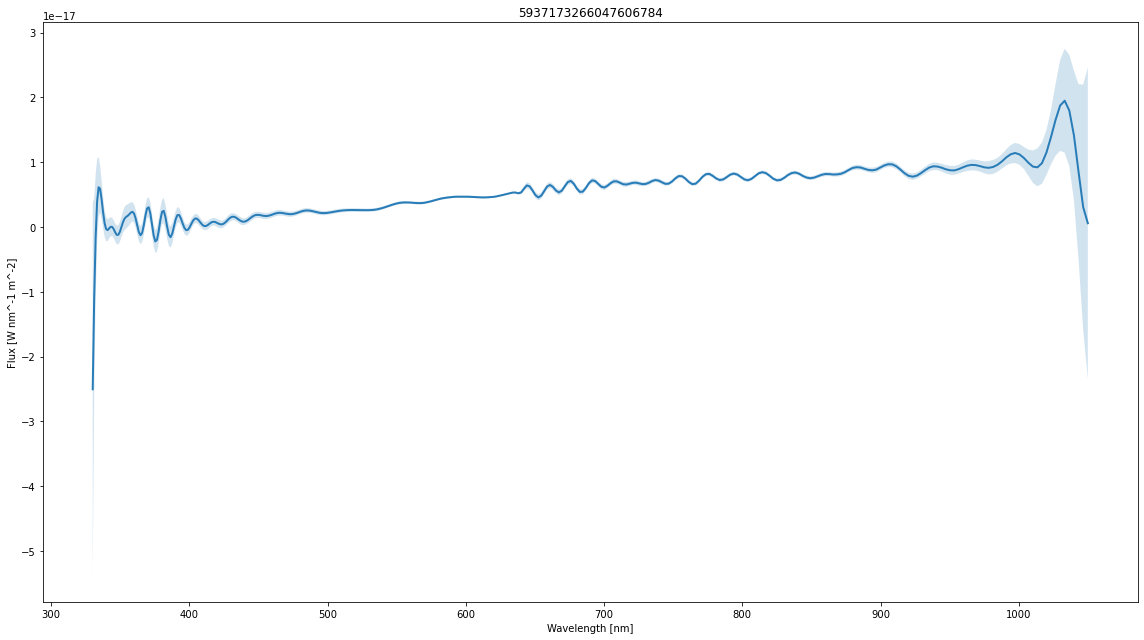

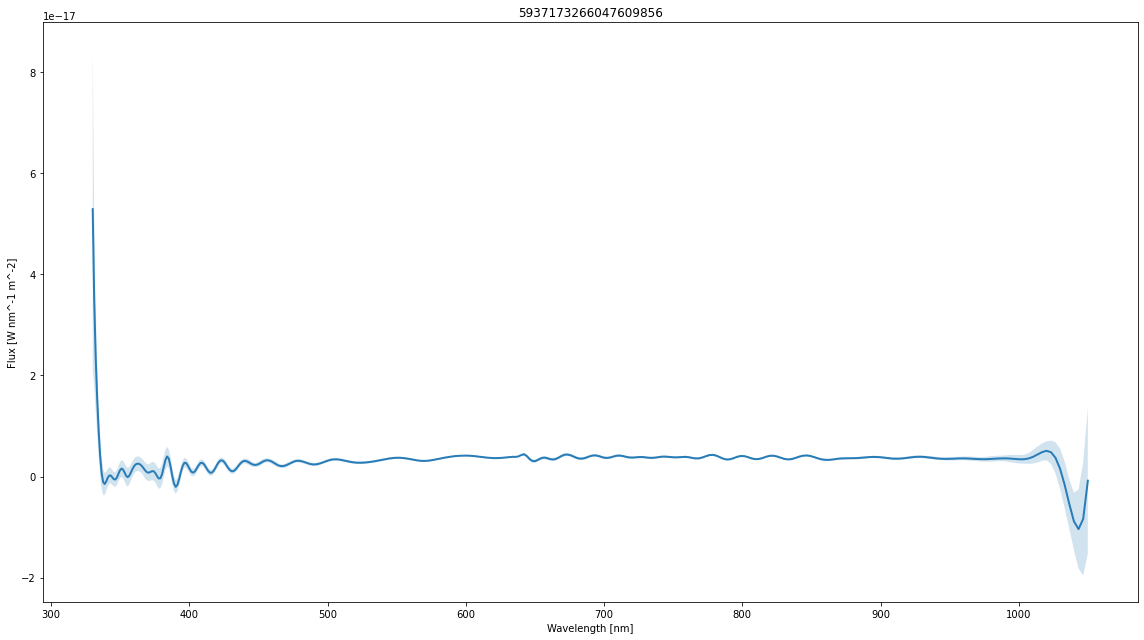

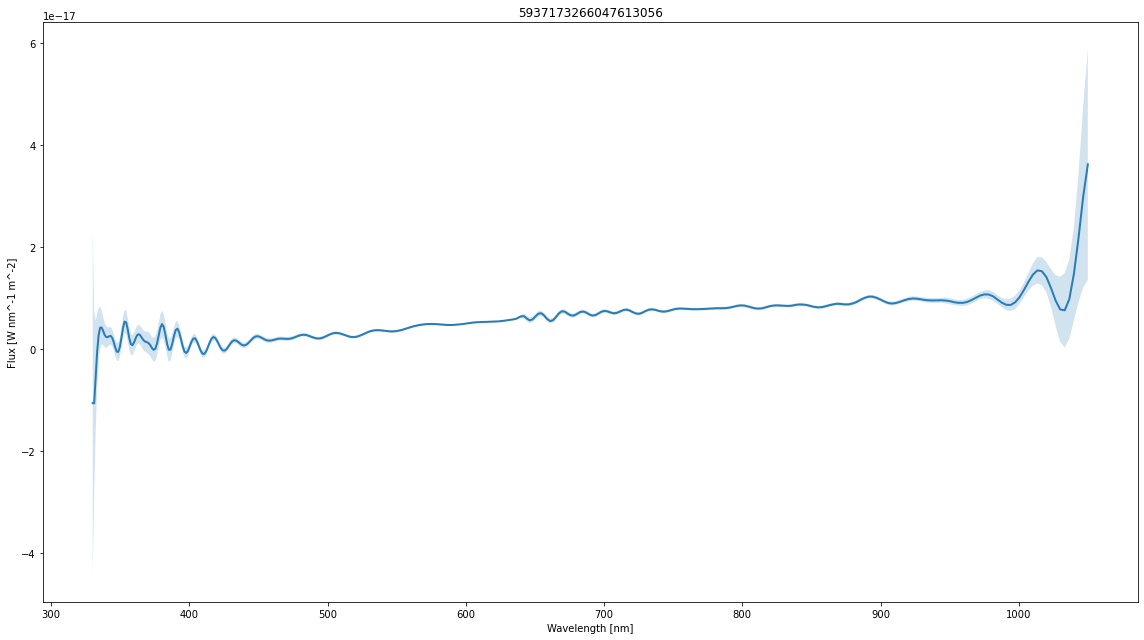

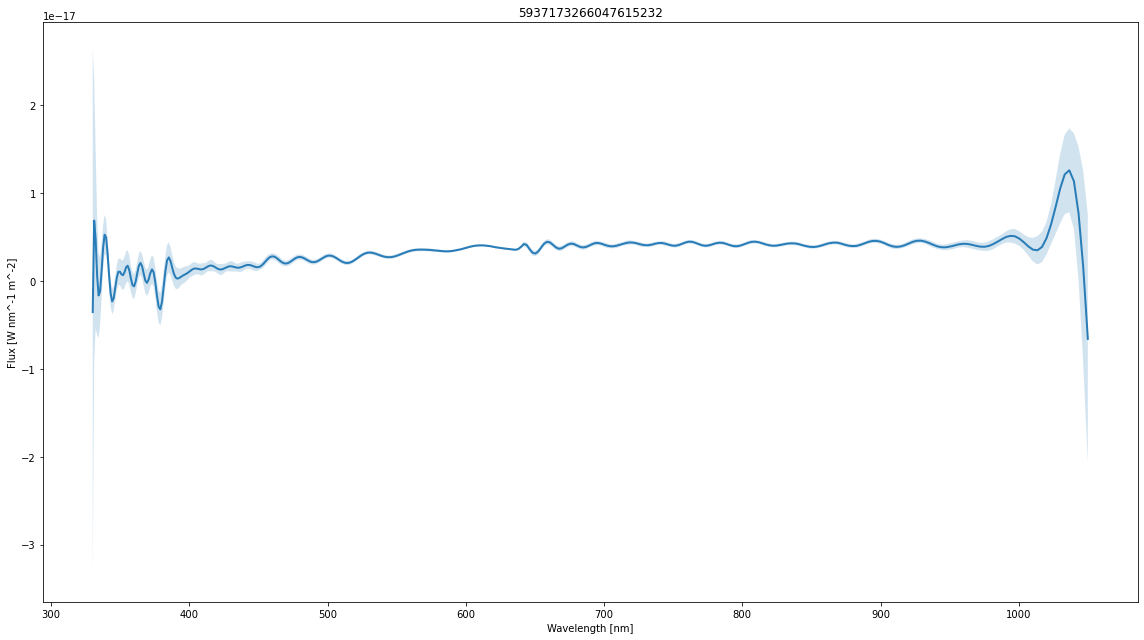

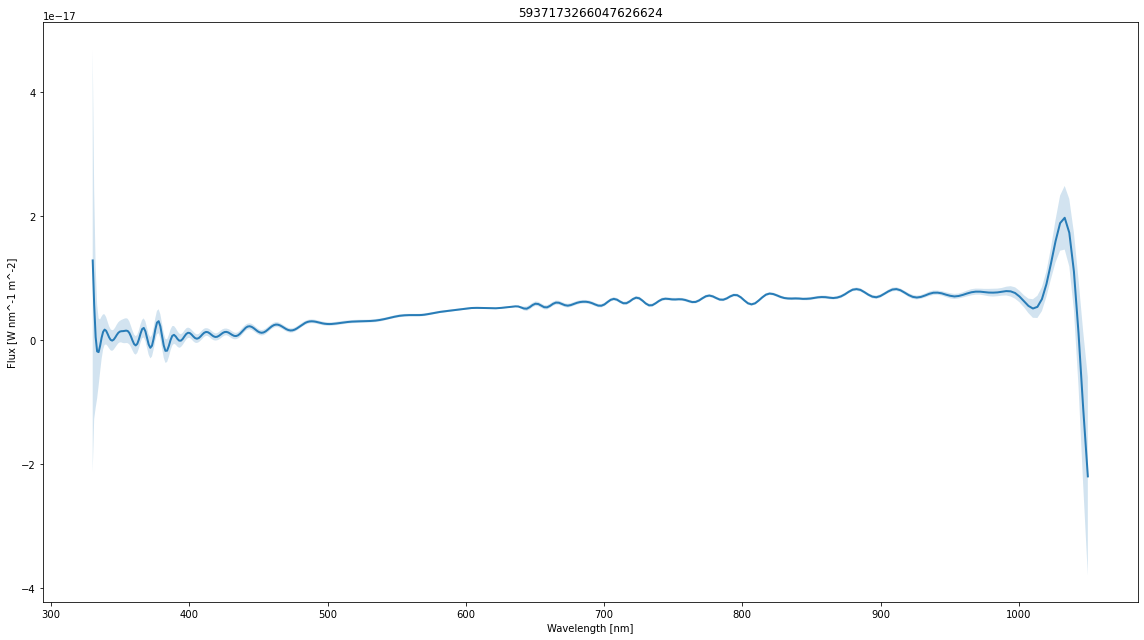

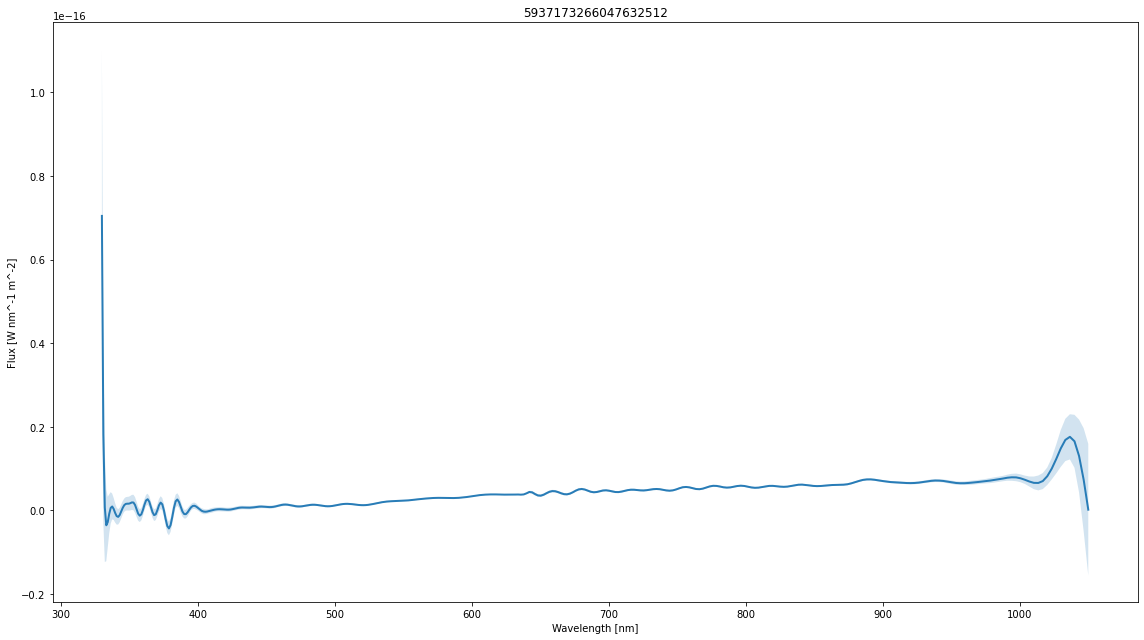

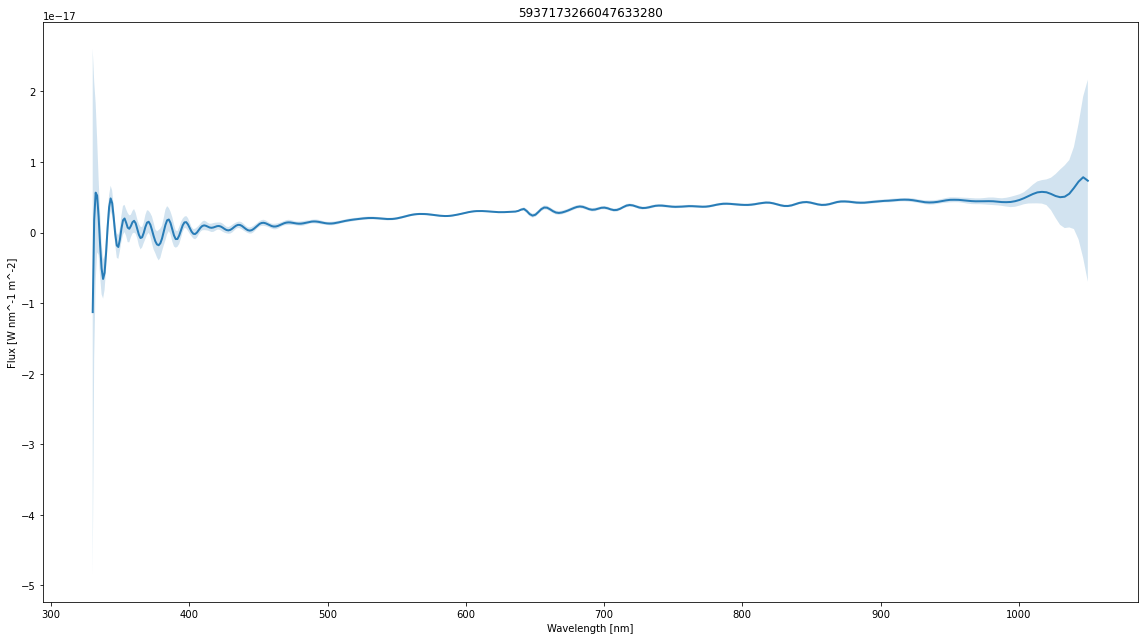

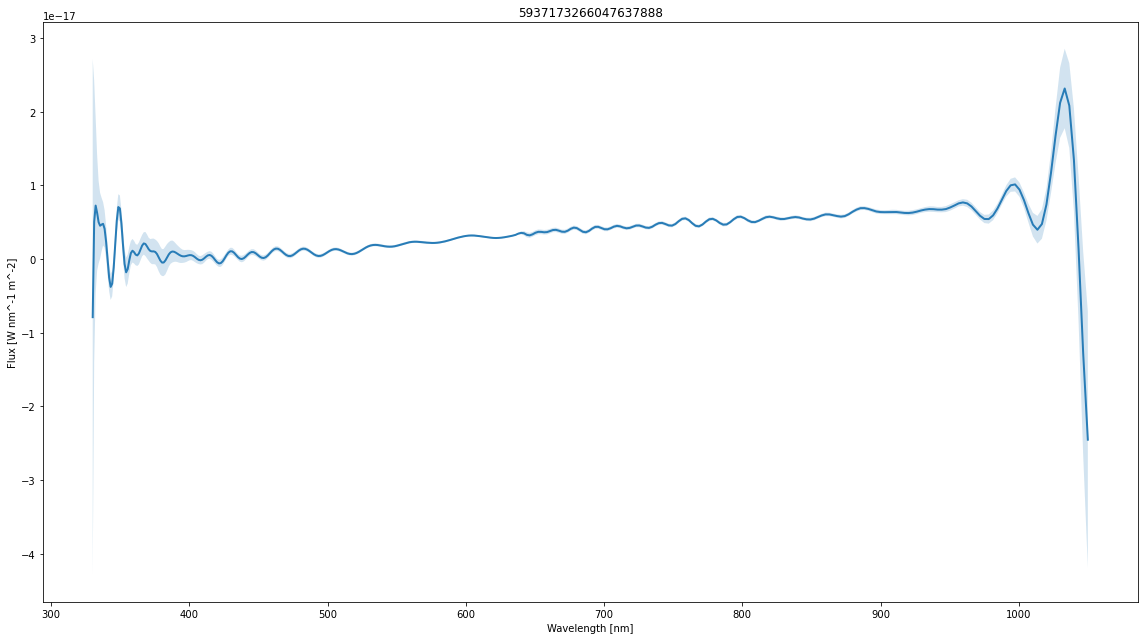

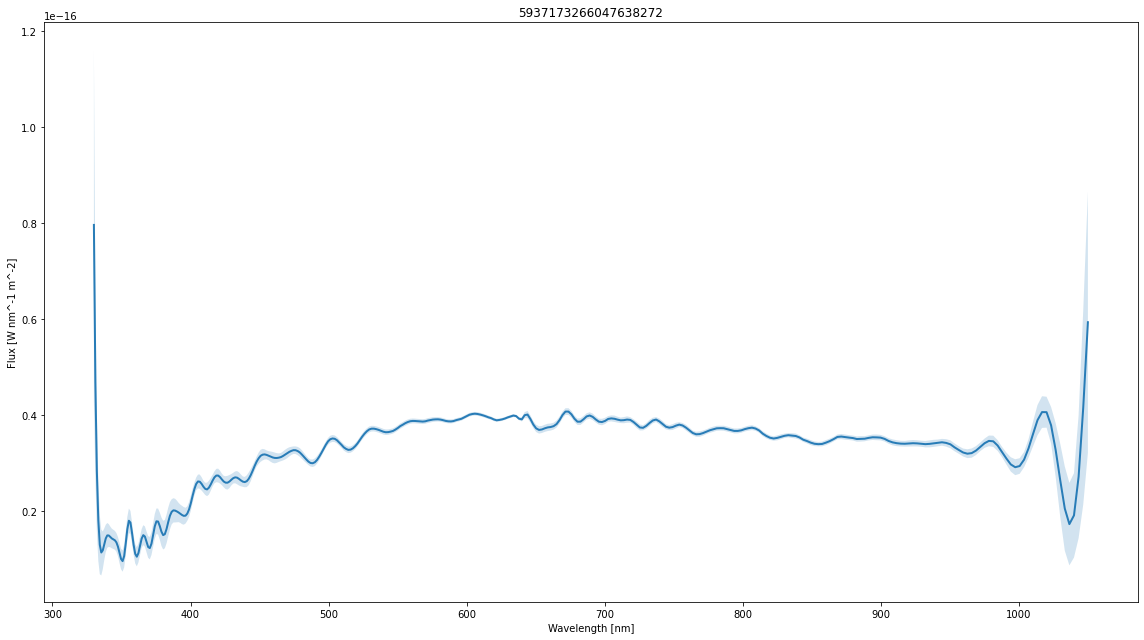

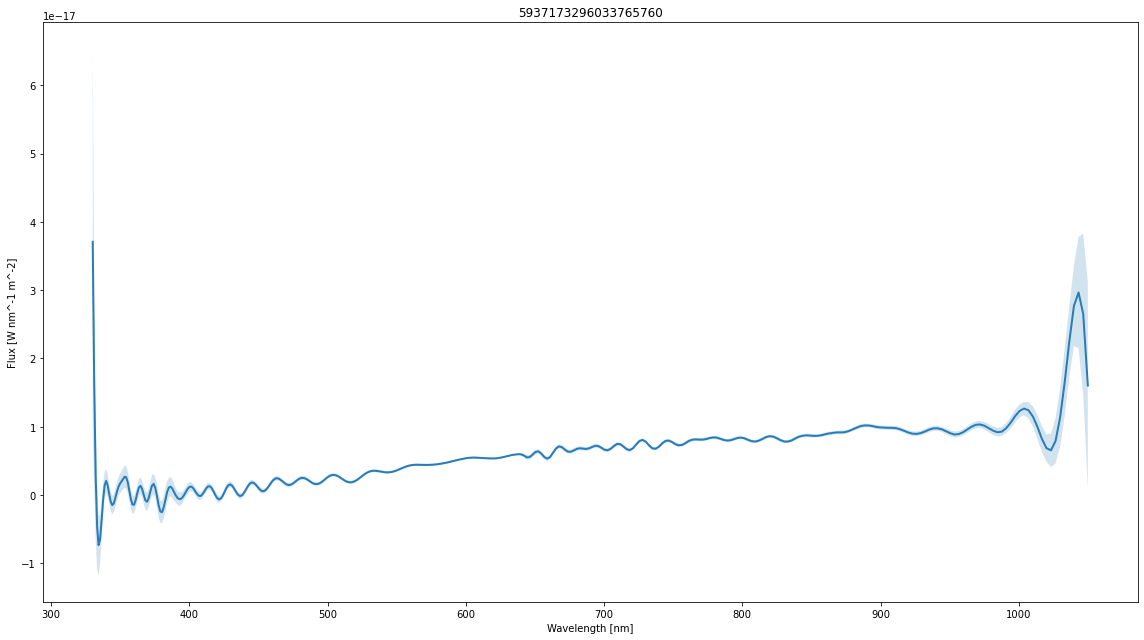

In [18]:
for idx in range(Nsources):
    the_source = calibrated_spectra_geom.iloc[[idx]] # Select row with index idx
    plot_spectra(the_source, sampling=sampling, legend=True)